In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

给定数据集$T={(x_1,y_1), (x_2,y_2),\cdots,(x_N,y_N)}$，其中$x_i \in \mathbb{R}^n$，$y_i \in \{+1, -1\}$，感知机模型求解函数$$f(x)=sign(\omega \cdot x + b)$$
其中$\omega$和$b$为感知机模型参数
$$sign(x)=\left\{\begin{array}{**lr**}+1, x \geq 0 \\ -1, x < 0\end{array} \right.$$

感知机模型损失函数为所有误分类点到超平面到距离
$$L(\omega, b)=-\sum_{x_i \in M} y_i(\omega \cdot x_i+b)$$
其中$M$为误分类点集。
采用随机梯度下降进行求解
$$\nabla_\omega L(\omega, b)=-\sum_{x_i \in M} x_i*y_i$$$$\nabla_b L(\omega, b)=-\sum_{x_i \in M}y_i$$

In [2]:
class Perceptron:
    '''
    感知机模型
    '''
    def __init__(self, dim, eta):
        '''
        dim: 输入空间的维度
        eta: 学习率
        '''
        self.w = np.zeros(dim)
        self.eta = eta
        self.b = 0
    
    def fit(self, X, Y):
        wrong = True
        while wrong:
            wrong = False
            for x, y in zip(X, Y):
                if y * (np.dot(self.w, x) + self.b) <= 0:
                    self.w += self.eta * x * y
                    self.b += self.eta * y
                    wrong = True

In [3]:
'''
加载鸢尾花数据集，仅使用前两个特征以及标签为0和1的数据
'''
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:100, :2]
Y = iris.target[:100]
Y = [1 if y == 1 else -1 for y in Y]

In [4]:
model = Perceptron(dim=2, eta=0.1)
model.fit(X, Y)

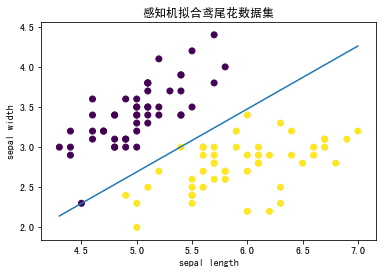

In [5]:
'''
感知机拟合超平面
'''
x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
y = -(model.w[0] * x + model.b) / model.w[1]
plt.plot(x, y)
'''
原始数据
'''
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('感知机拟合鸢尾花数据集')
plt.show()